In [1]:
# Se importan las librerías a utilizar

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# Preparación de datos 

dt = pd.read_csv('cars.csv')

a = np.array(dt['Weight'])
b = np.array(dt['Volume'])
c = np.array(dt['CO2'])

In [3]:
# Arreglo de datos y creación del modelo

x = np.array([a,b]).T                  # Se concatenan en una matriz los valores "x" y "y"
regression = LinearRegression()              # Se instancia el modelo de regresión
regression.fit(x, c)                         # Se entrena el modelo
regression.predict([[10,8]])                 # Se prueba el modelo

array([79.83267082])

Escriba el valor de "x" -> 1547
Escriba el valor de "y" -> 451


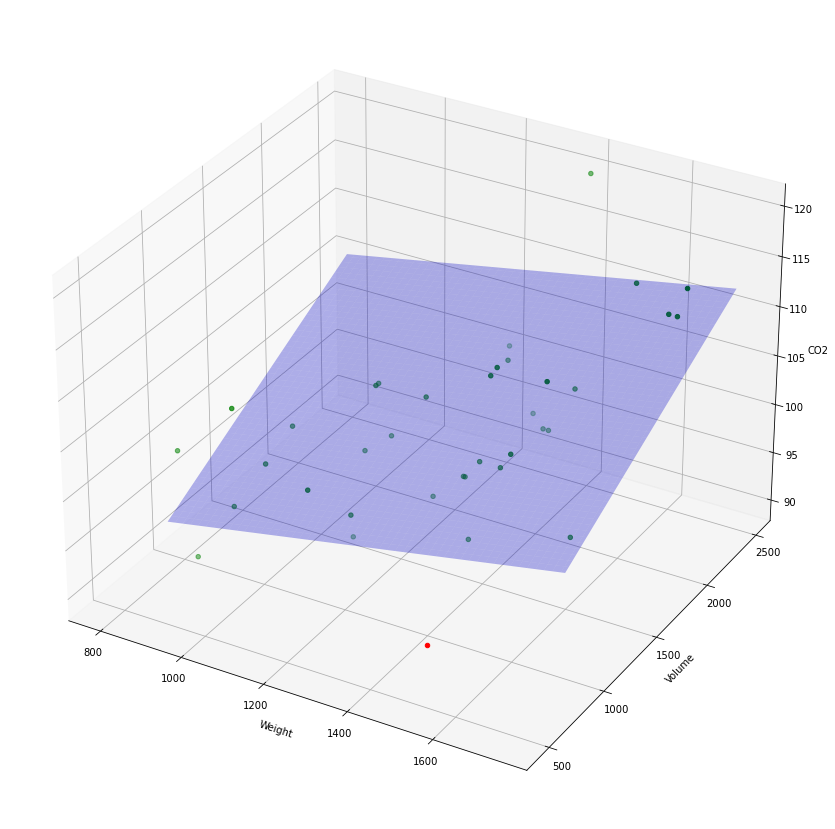

In [5]:
# Generación de figura

fig = plt.figure(figsize = (15,15))       # Creación y asignación de dimensiones para el plano 
ax = plt.axes(projection='3d')            # Creación de gráfica 3d
ax.set_xlabel("Weight")                   # Asignación de nombre al eje x
ax.set_ylabel("Volume")                   # Asignación de nombre al eje y
ax.set_zlabel("CO2")                      # Asignación de nombre al eje z
ax.scatter3D(a, b, c,c="green")           # Impresión de datos

prediccionx = np.linspace(a.min(), a.max(),100)  # Matriz x que genera el plano que representa el comportamiento del modelo 
predicciony = np.linspace(b.min(), b.max(),100)  # Matriz y que genera el plano que representa el comportamiento del modelo 

X, Y = np.meshgrid(prediccionx, predicciony)     # np.meshgrid sirve para visualizar el plano en la gráfica

prediccionz = np.ones(10000).reshape(100,100)    # Matriz z que gusrda los valores que calcula el modelo
for i in range (100):
    for k in range (100):
        pred_lin = regression.predict([[X[i][k], Y[i][k]]])
        prediccionz[i][k] = pred_lin

ax.plot_surface(X,Y,prediccionz,color="blue",alpha=0.3) 
#ax.view_init(0,0)

# Para calcular y predecir un valor específico y verlo en la gráfica

valorx = int(input('Escriba el valor de "x" -> '))
valory = int(input('Escriba el valor de "y" -> '))
valorz=regression.predict([[valorx,valory]])
ax.scatter3D(valorx,valory,valorz, color="red")